# Daily-Dose-of-Data-Science

[Visualise a Confusion Matrix Using Sankey Diagram](https://blog.dailydoseofds.com/p/visualise-a-confusion-matrix-using)

Author: Avi Chawla

In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go

In [2]:
RED = "rgba(245,173,168,0.6)"
GREEN = "rgba(211,255,216,0.6)"

In [3]:
def create_df_from_confusion_matrix(confusion_matrix, class_labels=None):
    
    
    if not len(class_labels):

        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"True Class-{i+1}" for i in range(confusion_matrix.shape[0])],
                          columns=[f"Predicted Class-{i+1}" for i in range(confusion_matrix.shape[0])])
    else:

        df = pd.DataFrame(data=confusion_matrix, 
                          index=[f"True {i}" for i in class_labels],
                          columns=[f"Predicted {i}" for i in class_labels])
    

    df = df.stack().reset_index()
    df.rename(columns={0:'instances', 'level_0':'actual', 'level_1':'predicted'}, inplace=True)
    
    df["colour"] = df.apply(lambda x: 
                               GREEN if x.actual.split()[1:] == x.predicted.split()[1:] 
                               else RED, axis=1)

    node_labels = pd.concat([df.actual, df.predicted]).unique()
    node_labels_indices = {label:index for index, label in enumerate(node_labels)}
    
    df =  df.assign(actual    = df.actual.apply(lambda x: node_labels_indices[x]),
                    predicted = df.predicted.apply(lambda x: node_labels_indices[x]))
    
    def get_link_text(row):
        if row["colour"] == GREEN:
            instance_count = row["instances"]
            source_class = ' '.join(node_labels[row['actual']].split()[1:])
            target_class = ' '.join(node_labels[row['predicted']].split()[1:])
            return f"{instance_count} {source_class} instances correctly classified as {target_class}"
        else:
            instance_count = row["instances"]
            source_class = ' '.join(node_labels[row['actual']].split()[1:])
            target_class = ' '.join(node_labels[row['predicted']].split()[1:])
            return f"{instance_count} {source_class} instances incorrectly classified as {target_class}"
        
    df["link_text"] = df.apply(get_link_text, axis = 1)
    return df, node_labels
    

def plot_confusion_matrix_as_sankey(confusion_matrix,  class_labels = None):
    
    df, labels = create_df_from_confusion_matrix(confusion_matrix,  class_labels)
    
    fig = go.Figure(data=[go.Sankey(
    
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "gray", width = 1.0),
      label = labels,
      hovertemplate = "%{label} has total %{value:d} instances<extra></extra>"
    ),
    link = dict(
      source = df.actual, 
      target = df.predicted,
      value = df.instances,
      color = df.colour,
      customdata = df['link_text'], 
      hovertemplate = "%{customdata}<extra></extra>"  
    ))])

    fig.update_layout(title_text="Confusion Matrix Sankey Diagram", font_size=15,
                      width=500, height=400)
    
    return fig

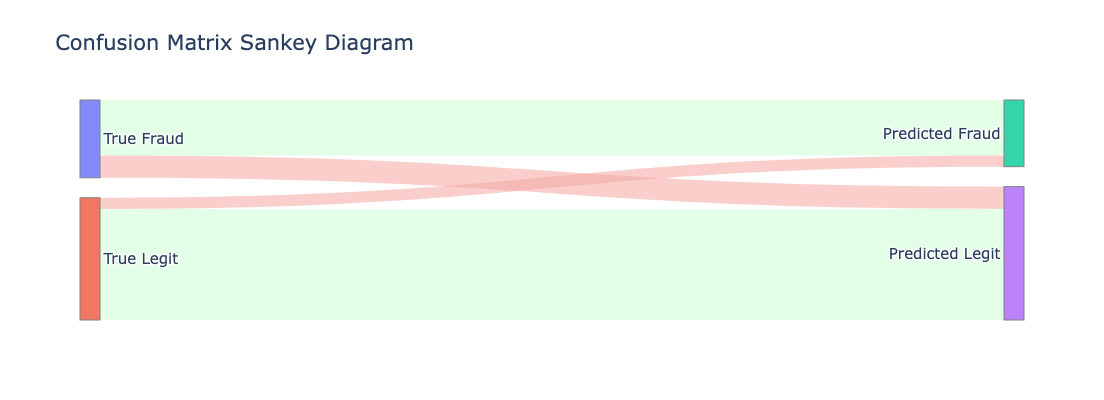

In [4]:
confusion_matrix = np.array([[10, 4],
                             [2, 20]])

plot_confusion_matrix_as_sankey(confusion_matrix,  ['Fraud', 'Legit'])